# TMB Server Statistics & Plots

A short [Jupyter Notebook](https://jupyter.org/) that takes data from [themixinbgowl.org](https://themixingbowl.org) server and plots/summarises the data.

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

data = Path('../data')
files = data.glob('*')

def read_data(path):
    """
    path : str
        Path to file to be read
    """
    df = pd.read_csv(path, sep='\t')
    df['Date'] = pd.to_datetime(df['added'], unit='s')
    df = df.drop(['added'], axis=1)
    df = df.set_index('Date')
    return df

webstats_df = read_data('../data/webstats.tsv')
peerscount_df = read_data('../data/peerscount.tsv')
responsetime_df = read_data('../data/responsetime.tsv')

figsize = (16,9)
alpha = 0.5
webstats_df.head()

,servername,active,accepted,handled,total,reading,writing,waiting
Date,,,,,,,,
2018-12-30 17:23:22,site,4,72770098,72768486,72759816,0,4,0
2018-12-30 17:23:22,proxy,114,66634173,66626684,73194598,0,4,110
2018-12-30 17:27:03,site,4,72776167,72774555,72765885,0,4,0
2018-12-30 17:27:03,proxy,89,66639519,66632030,73200708,0,4,85
2018-12-30 17:28:01,site,4,72777519,72775907,72767237,0,4,0


# Webstats

In [2]:
webstats_df.describe()

,active,accepted,handled,total,reading,writing,waiting
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.00000,10000.00000
mean,52.066600,7.546878e+07,7.546418e+07,7.898363e+07,0.018700,5.72720,46.30260
std,49.458091,4.673237e+06,4.675284e+06,3.459191e+06,0.202866,6.29172,48.75814
min,1.000000,6.663417e+07,6.662668e+07,7.275982e+07,0.000000,1.00000,0.00000
25%,4.000000,7.219085e+07,7.218334e+07,7.598227e+07,0.000000,3.00000,0.00000
50%,61.000000,7.531264e+07,7.530780e+07,7.899653e+07,0.000000,4.00000,21.00000
75%,95.000000,7.877194e+07,7.877026e+07,8.195352e+07,0.000000,6.00000,89.00000
max,579.000000,8.470513e+07,8.470345e+07,8.518744e+07,6.000000,103.00000,576.00000


## Accepted, Handled and Total

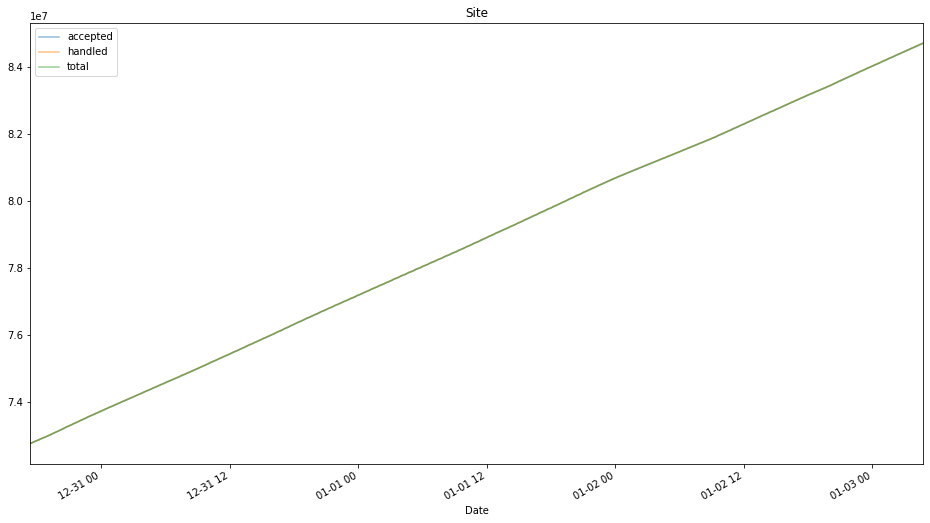

In [3]:
webstats_df[webstats_df['servername'] == 'site'][['servername', 'accepted', 'handled', 'total']].groupby('servername').plot(figsize=figsize, alpha=alpha, title='Site')
plt.savefig('../plots/webstats_site_requests.png')

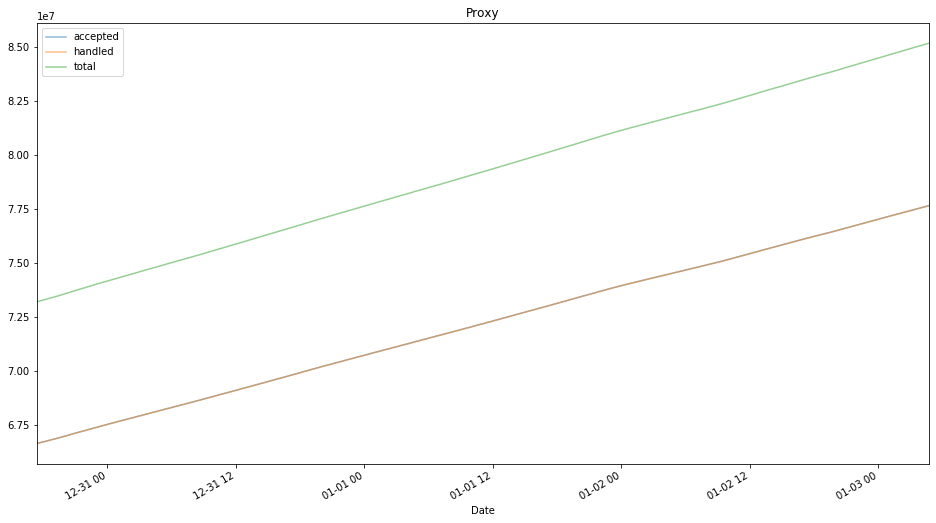

In [4]:
webstats_df[webstats_df['servername'] == 'proxy'][['servername', 'accepted', 'handled', 'total']].groupby('servername').plot(figsize=figsize, alpha=alpha, title='Proxy')
plt.savefig('../plots/webstats_proxy_requests.png')

## Active, Reading, Writing and Waiting

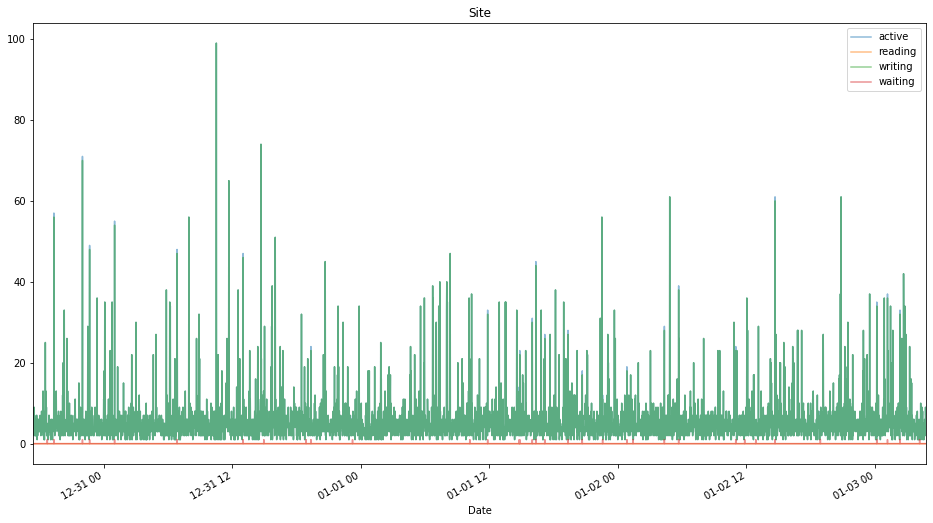

In [5]:
webstats_df[webstats_df['servername'] == 'site'][['servername', 'active', 'reading', 'writing', 'waiting']].groupby('servername').plot(figsize=figsize, alpha=alpha, title='Site')
plt.savefig('../plots/webstats_site_activity.png')

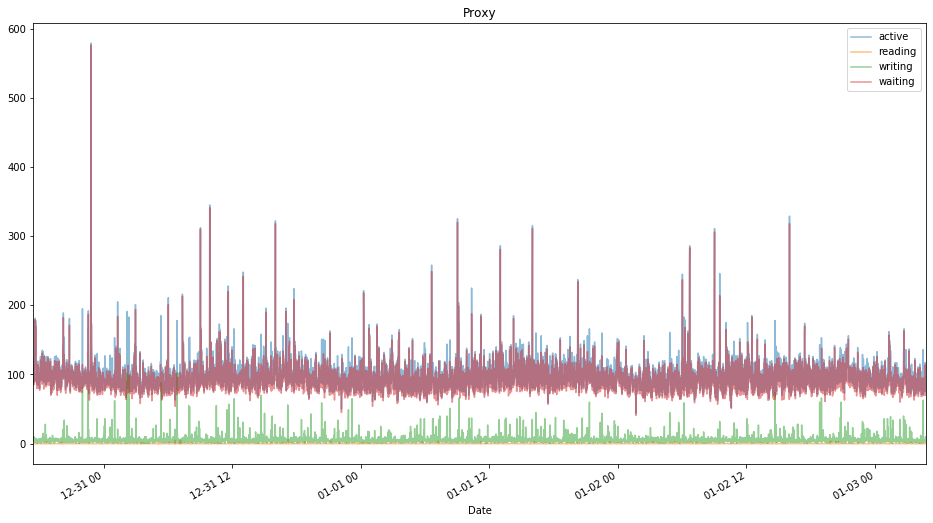

In [6]:
webstats_df[webstats_df['servername'] == 'proxy'][['servername', 'active', 'reading', 'writing', 'waiting']].groupby('servername').plot(figsize=figsize, alpha=alpha, title='Proxy')
plt.savefig('../plots/webstats_proxy_activity.png')

# Response Time

In [7]:
responsetime_df.describe()

,mstaken
count,1000.000000
mean,1574.112000
std,384.710033
min,1001.000000
25%,1251.750000
50%,1575.000000
75%,1854.000000
max,2585.000000


## Milliseconds Taken

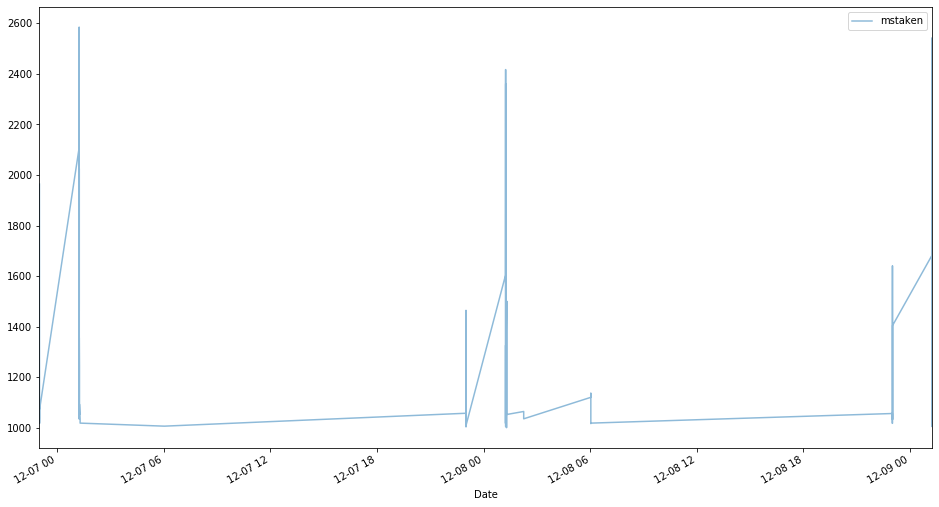

In [8]:
responsetime_df.plot(figsize=figsize, alpha=alpha)
plt.savefig('../plots/responsetime.png')

# Peers Count

In [9]:
peerscount_df.describe()

,value
count,10000.000000
mean,50830.486900
std,3268.550055
min,43723.000000
25%,48136.250000
50%,51494.000000
75%,53379.000000
max,64989.000000


## Peers

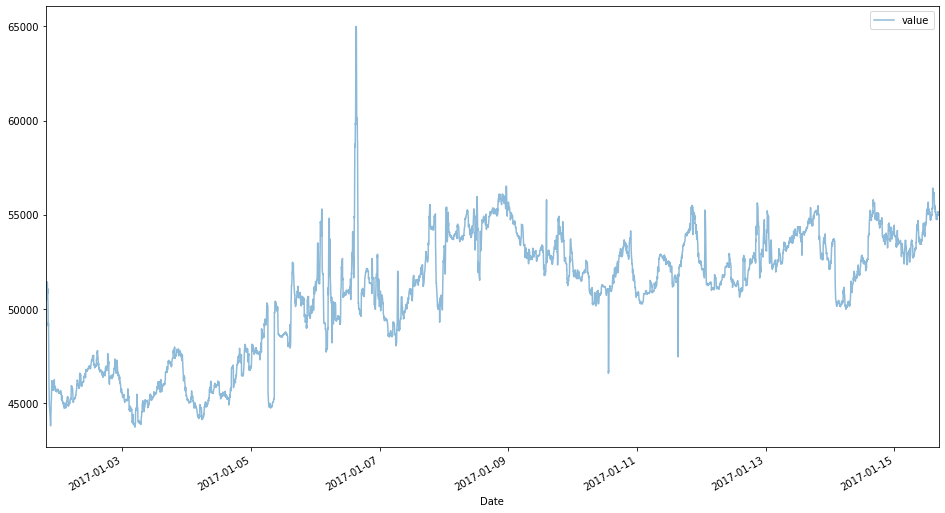

In [10]:
peerscount_df.plot(figsize=figsize, alpha=alpha)
plt.savefig('../plots/peerscount.png')